In [69]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import windrose as wr
from sklearn.preprocessing import MinMaxScaler


import plotly.express as px

import matplotlib.cm as cm
import matplotlib.ticker as ticker


custom_params = {"axes.spines.right": False, "axes.spines.top": False}

sns.set_theme(style = 'whitegrid', rc = custom_params, palette="light:b", font_scale= 1.5)

plt.rcParams['figure.figsize'] = (6, 3.5)
plt.rcParams['figure.dpi'] = 400

In [5]:
df = pd.read_csv('../data/GEFCom2014Data/Wind/raw_data_incl_features.csv', parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')

df.head()

,ZONEID,TARGETVAR,U10,V10,U100,V100,HOUR,MONTH,WEEKDAY,IS_HOLIDAY,WS10,WS100,WD10,WD100,WD100CARD,WD10CARD,U100NORM,V100NORM
TIMESTAMP,,,,,,,,,,,,,,,,,,
2012-01-01 01:00:00,1,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,1,6,1,3.421530,4.652334,321.614439,321.999735,NW,NW,0.615665,-0.788008
2012-01-01 02:00:00,1,0.054879,2.521695,-1.796960,3.344859,-2.464761,2,1,6,1,3.096451,4.154892,305.473680,306.385781,NW,NW,0.805041,-0.593219
2012-01-01 03:00:00,1,0.110234,2.672210,-0.822516,3.508448,-1.214093,3,1,6,1,2.795932,3.712577,287.108562,289.088098,WNW,WNW,0.945017,-0.327022
2012-01-01 04:00:00,1,0.165116,2.457504,-0.143642,3.215233,-0.355546,4,1,6,1,2.461699,3.234831,273.345160,276.310236,W,W,0.993941,-0.109912
2012-01-01 05:00:00,1,0.156940,2.245898,0.389576,2.957678,0.332701,5,1,6,1,2.279435,2.976332,260.159324,263.581938,W,W,0.993733,0.111782


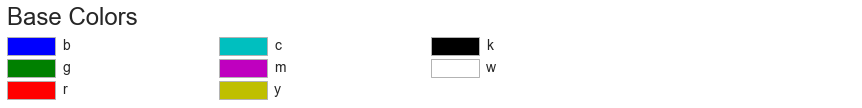

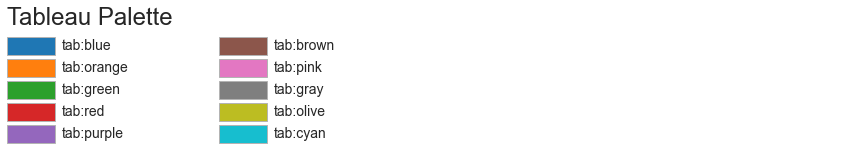

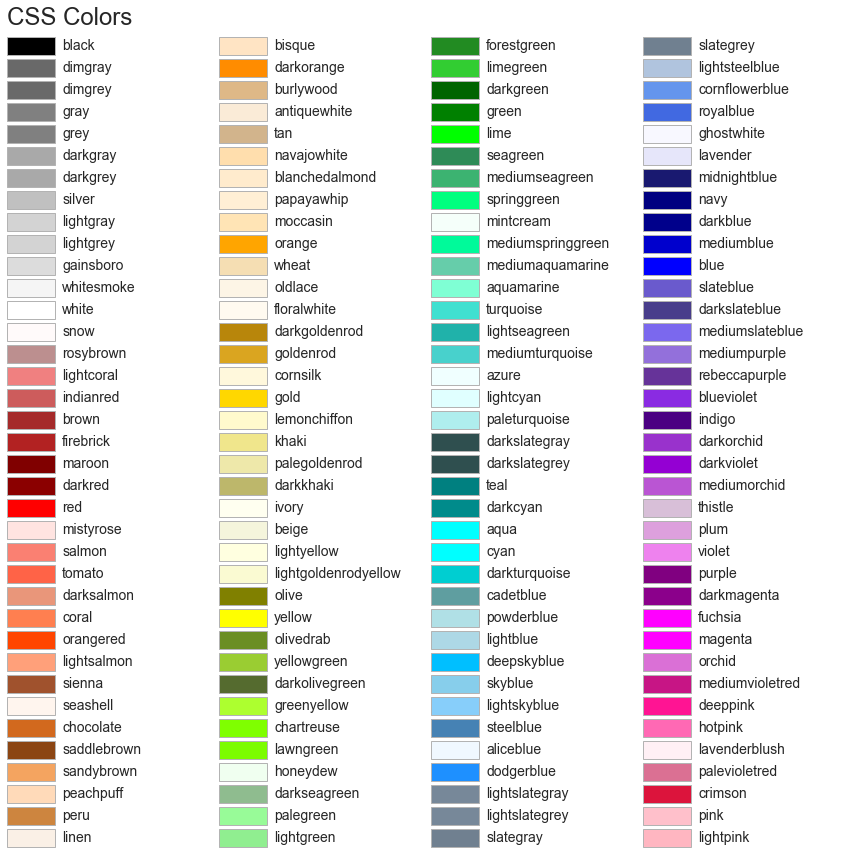

In [46]:
from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


def plot_colortable(colors, title, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(mcolors.BASE_COLORS, "Base Colors",
                sort_colors=False, emptycols=1)
plot_colortable(mcolors.TABLEAU_COLORS, "Tableau Palette",
                sort_colors=False, emptycols=2)

plot_colortable(mcolors.CSS4_COLORS, "CSS Colors")

# Optionally plot the XKCD colors (Caution: will produce large figure)
# xkcd_fig = plot_colortable(mcolors.XKCD_COLORS, "XKCD Colors")
# xkcd_fig.savefig("XKCD_Colors.png")

plt.show()

# Define plotting function

In [76]:
kwargs =   {'order' : None,
            'color' : None,
            'hue' : None}

def plot_x_y(x_var = 'WD100CARD', ylim = 0.45, time_format = False, x_label = '', x_ticklabels = None, kwargs = None, y_label = 'Energy production'):
    fig, ax = plt.subplots()
    sns.barplot(data = df, x = x_var, y = 'TARGETVAR', ax = ax, ci = None, **kwargs)
    if time_format:
        ax.set_xticklabels(['{}:00'.format(str(i)) for i, _ in enumerate(ax.get_xticklabels())])

    ax.tick_params(axis='both')
    plt.xticks(rotation = 90)
    if x_ticklabels:
        ax.set_xticklabels(x_ticklabels)
    plt.ylim([0, ylim])
    plt.yticks(np.arange(0,(ylim // 0.1) * 0.1 + 0.1,0.1))
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.show()
    plt.savefig(f'../images/Target_by_{x_var}.png')

# TARGETVAR by HOUR

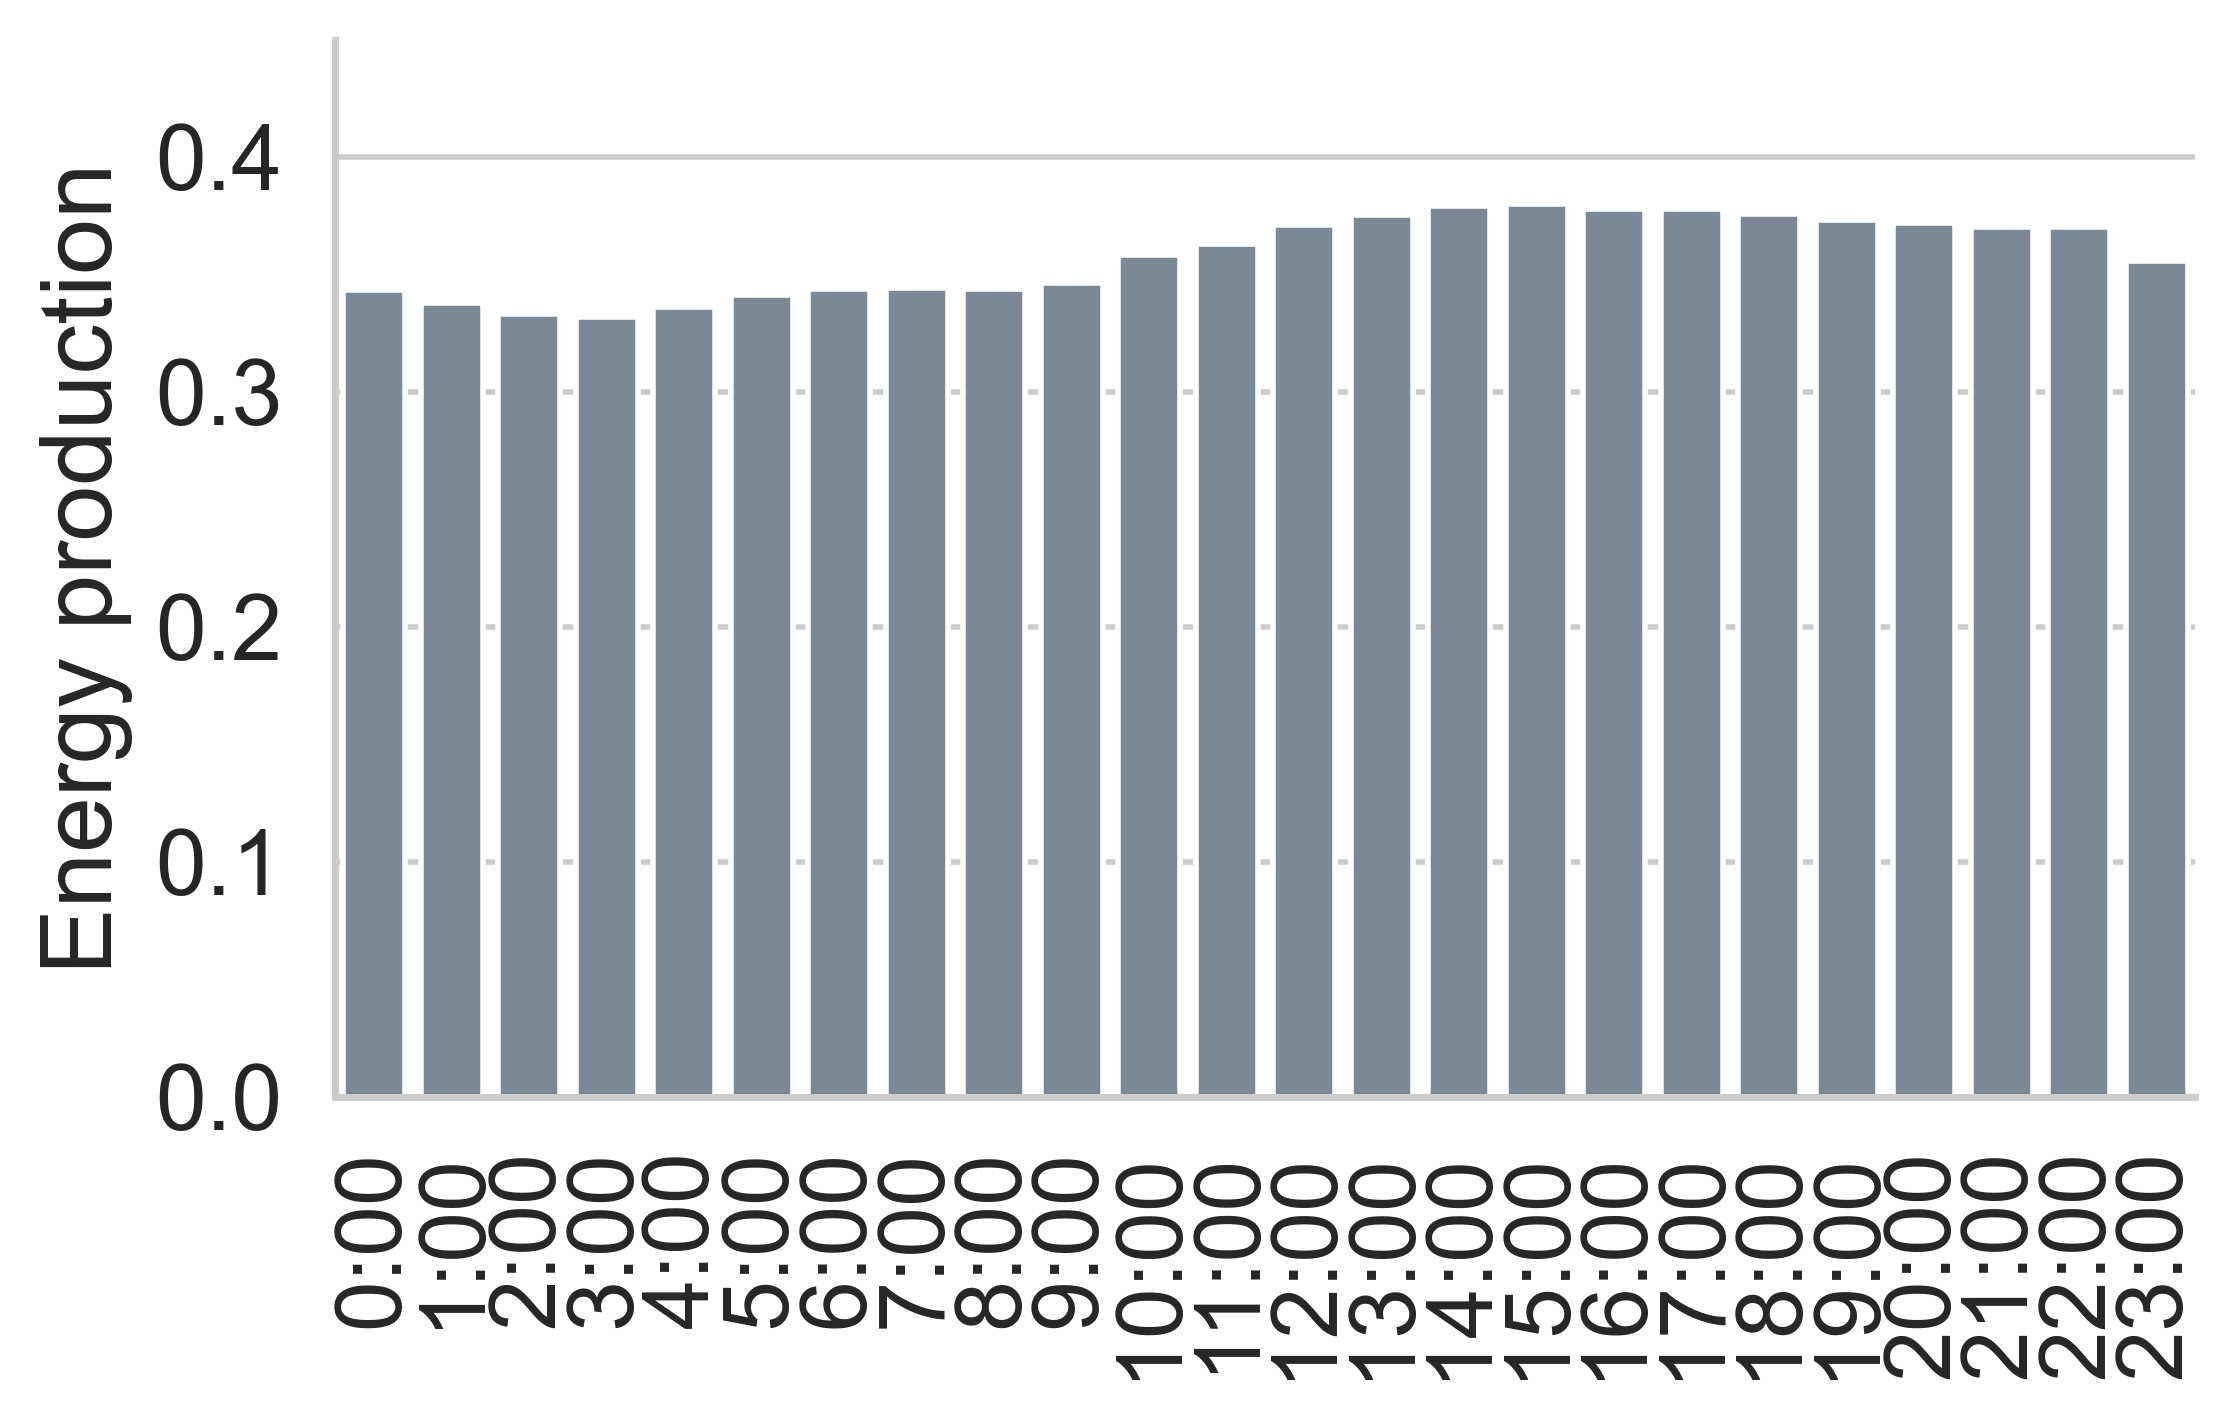

<Figure size 2400x1400 with 0 Axes>

In [70]:
kwargs =   {'order' : None,
            'color' : 'lightslategray',
            'hue' : None}

plot_x_y(x_var = 'HOUR', time_format= True, kwargs=kwargs)

# TARGETVAR by WD100CARD

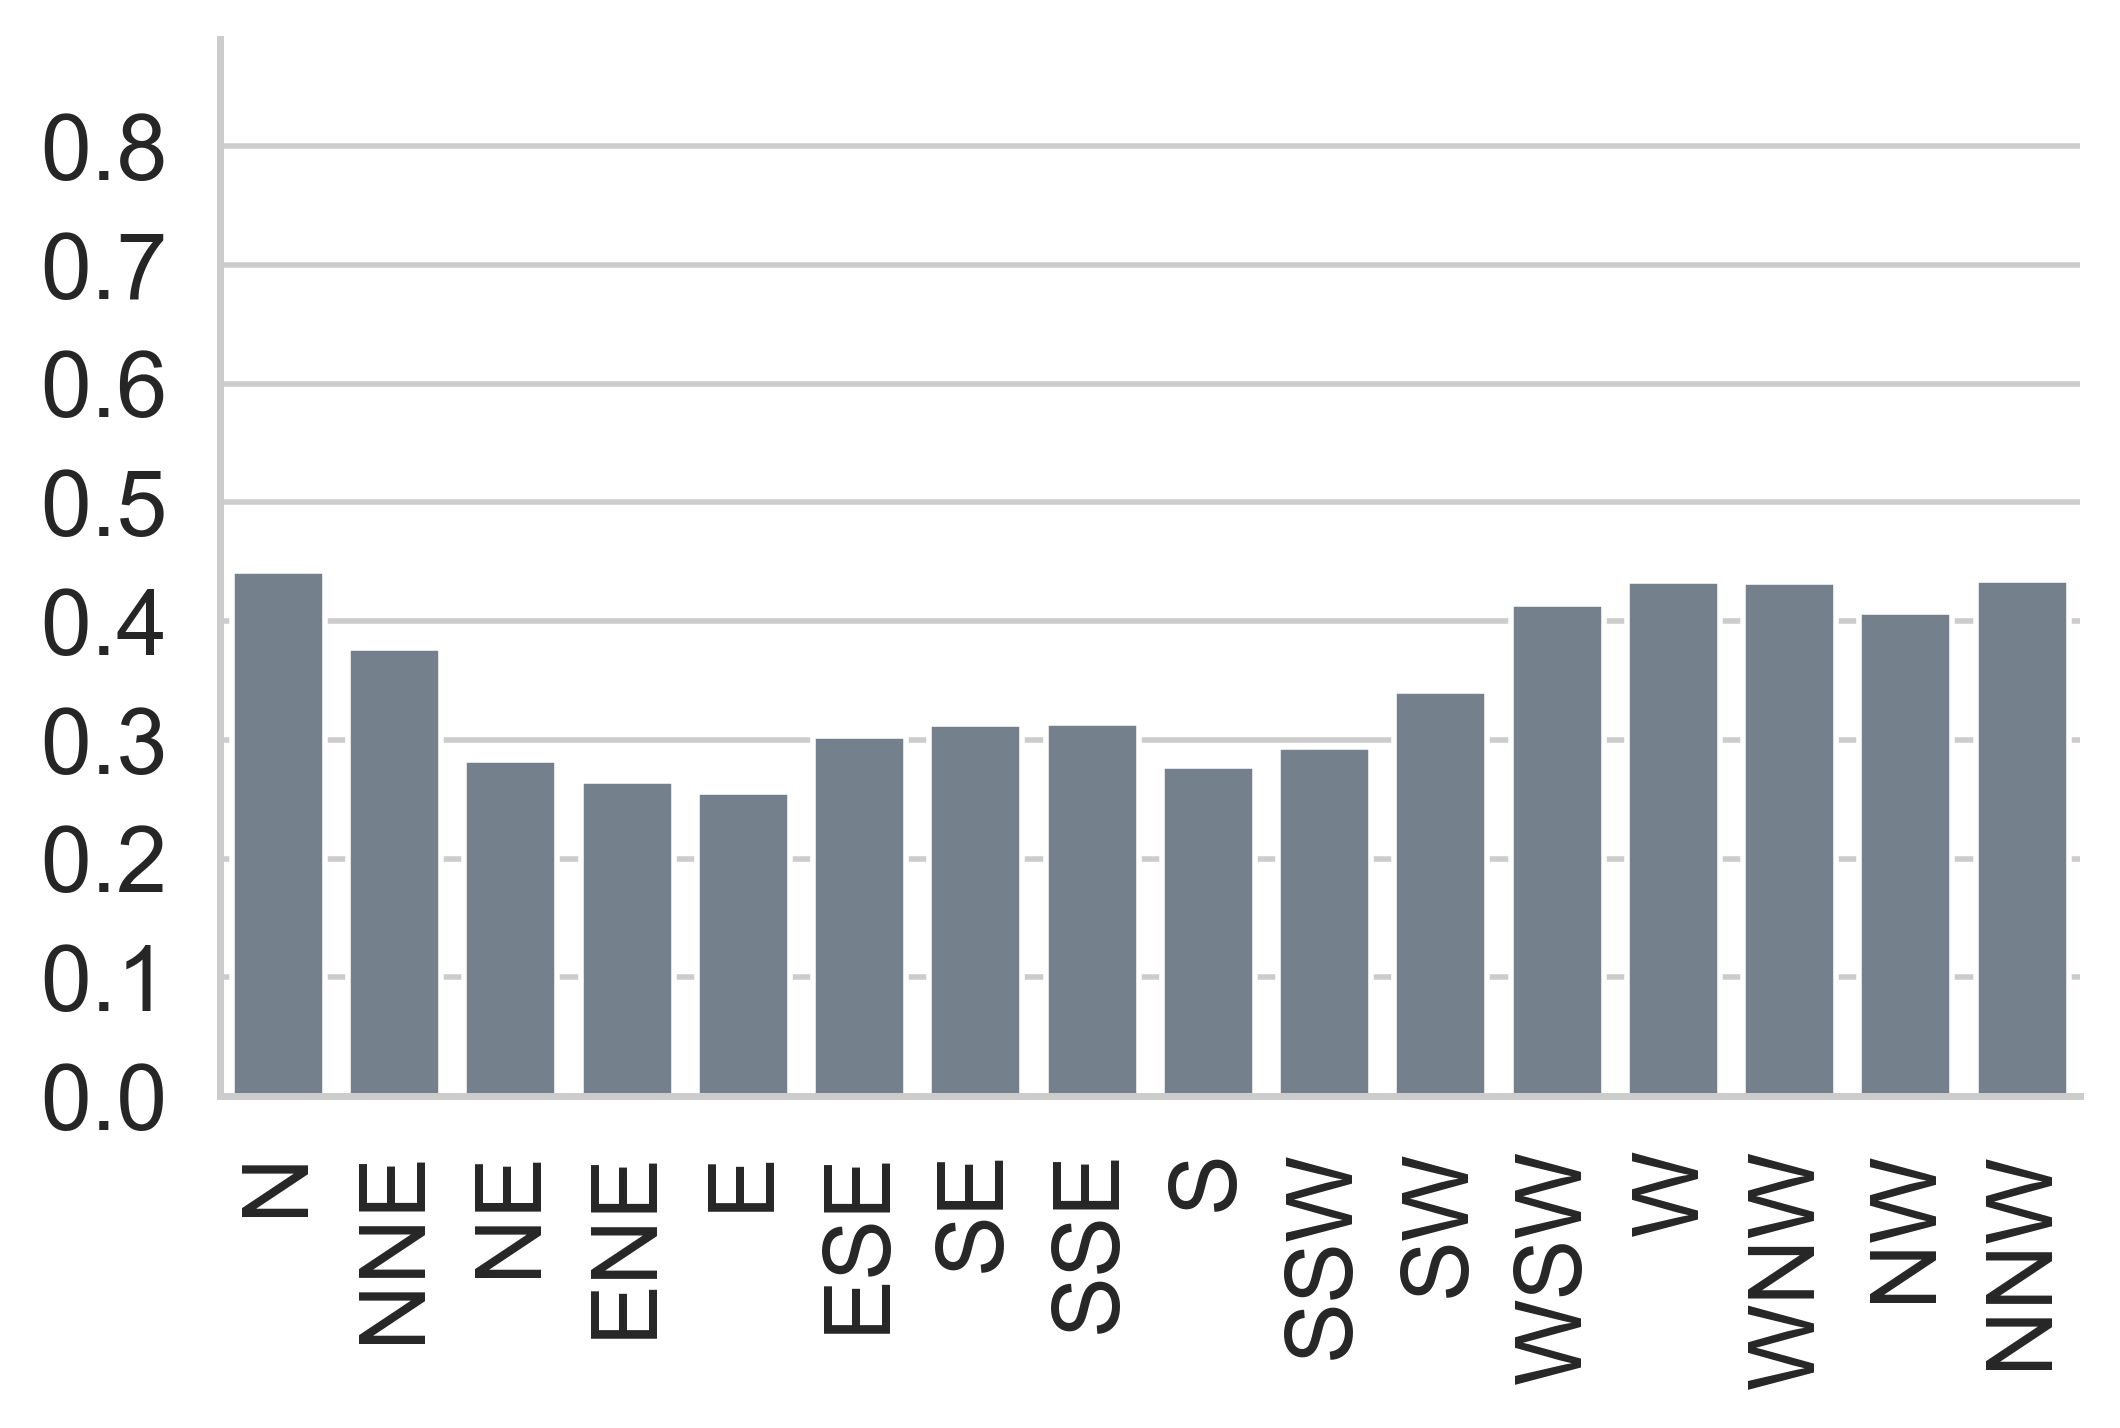

<Figure size 2400x1400 with 0 Axes>

In [77]:
order = ["N", "NNE", "NE", "ENE", "E", "ESE", "SE", "SSE",
                    "S", "SSW", "SW", "WSW", "W", "WNW", "NW", "NNW"]
                    
kwargs =   {'order' : order,
            'color' : 'slategray',
            'hue' : None}

plot_x_y(x_var= 'WD100CARD', kwargs = kwargs, ylim=0.89, y_label="")

# TARGETVAR by WS100

In [56]:
ws_bins = np.arange(df.WS100.min() // 1, (df.WS100.max() + 1) // 1 + 2, 2, dtype = int)

ws_labels = []
for i, bin_ in enumerate(ws_bins):
    if i > len(ws_bins) - 2:
        break
    ws_labels.append(f'{bin_}-{ws_bins[i + 1]}')
    
df['WS100BIN'] = pd.cut(df['WS100'], bins=ws_bins, labels=ws_labels)

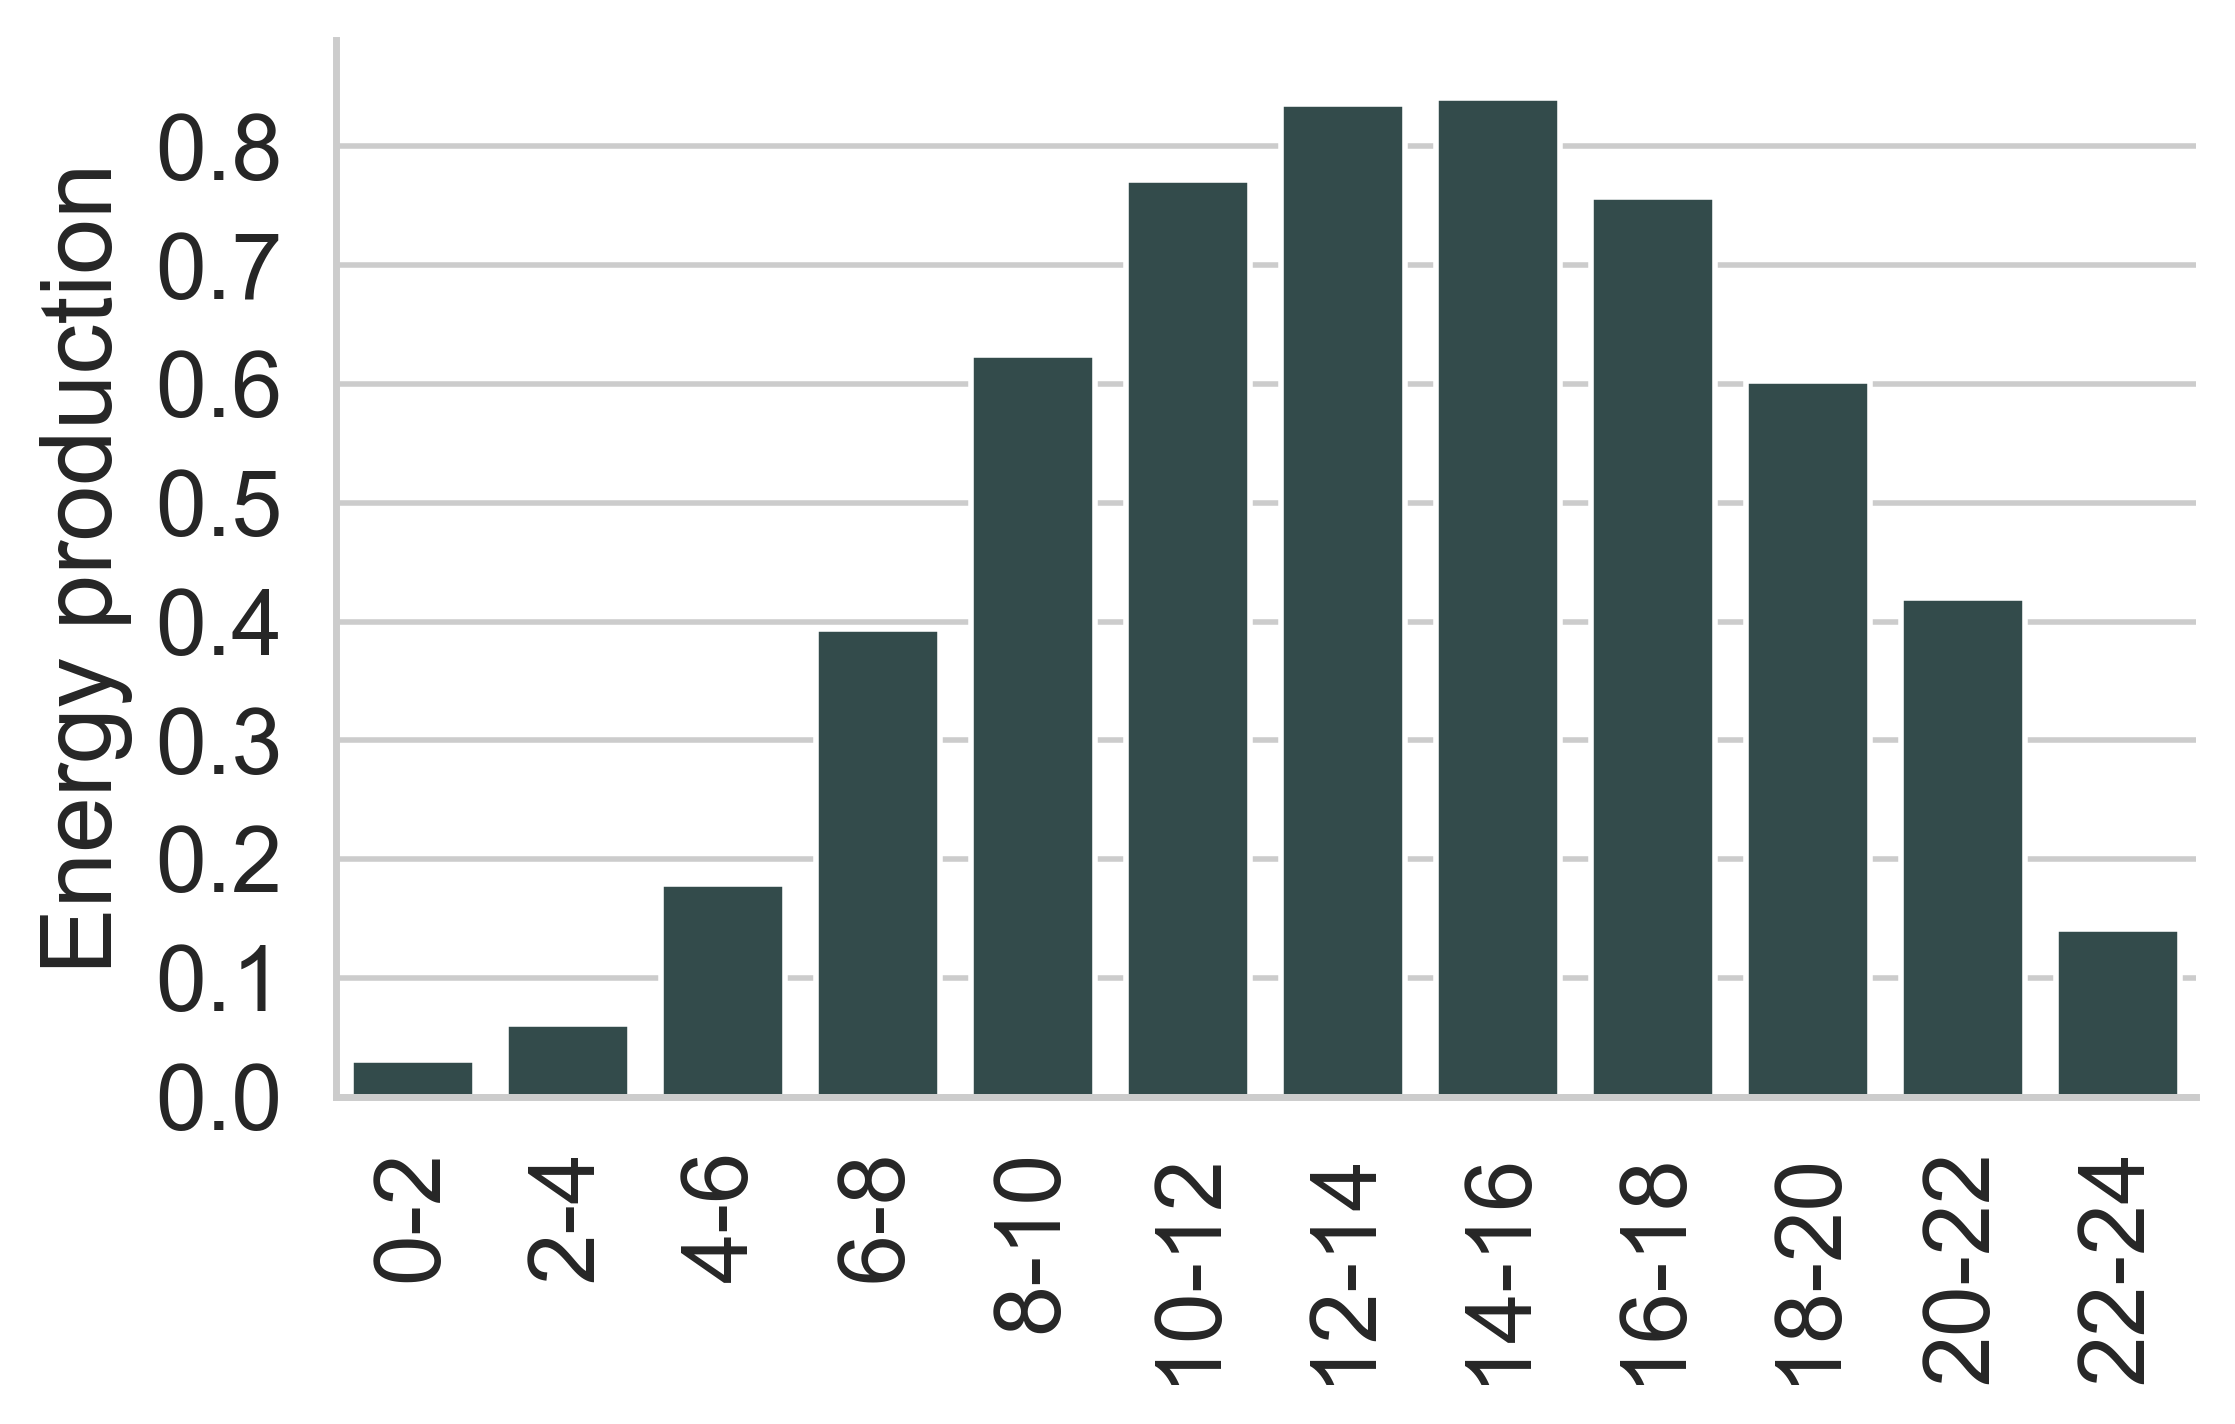

<Figure size 2400x1400 with 0 Axes>

In [78]:
kwargs =   {'order' : None,
            'color' : 'darkslategray',
            'hue' : None}

plot_x_y(x_var = "WS100BIN", ylim= 0.89, kwargs= kwargs)

# TARGETVAR by MONTH

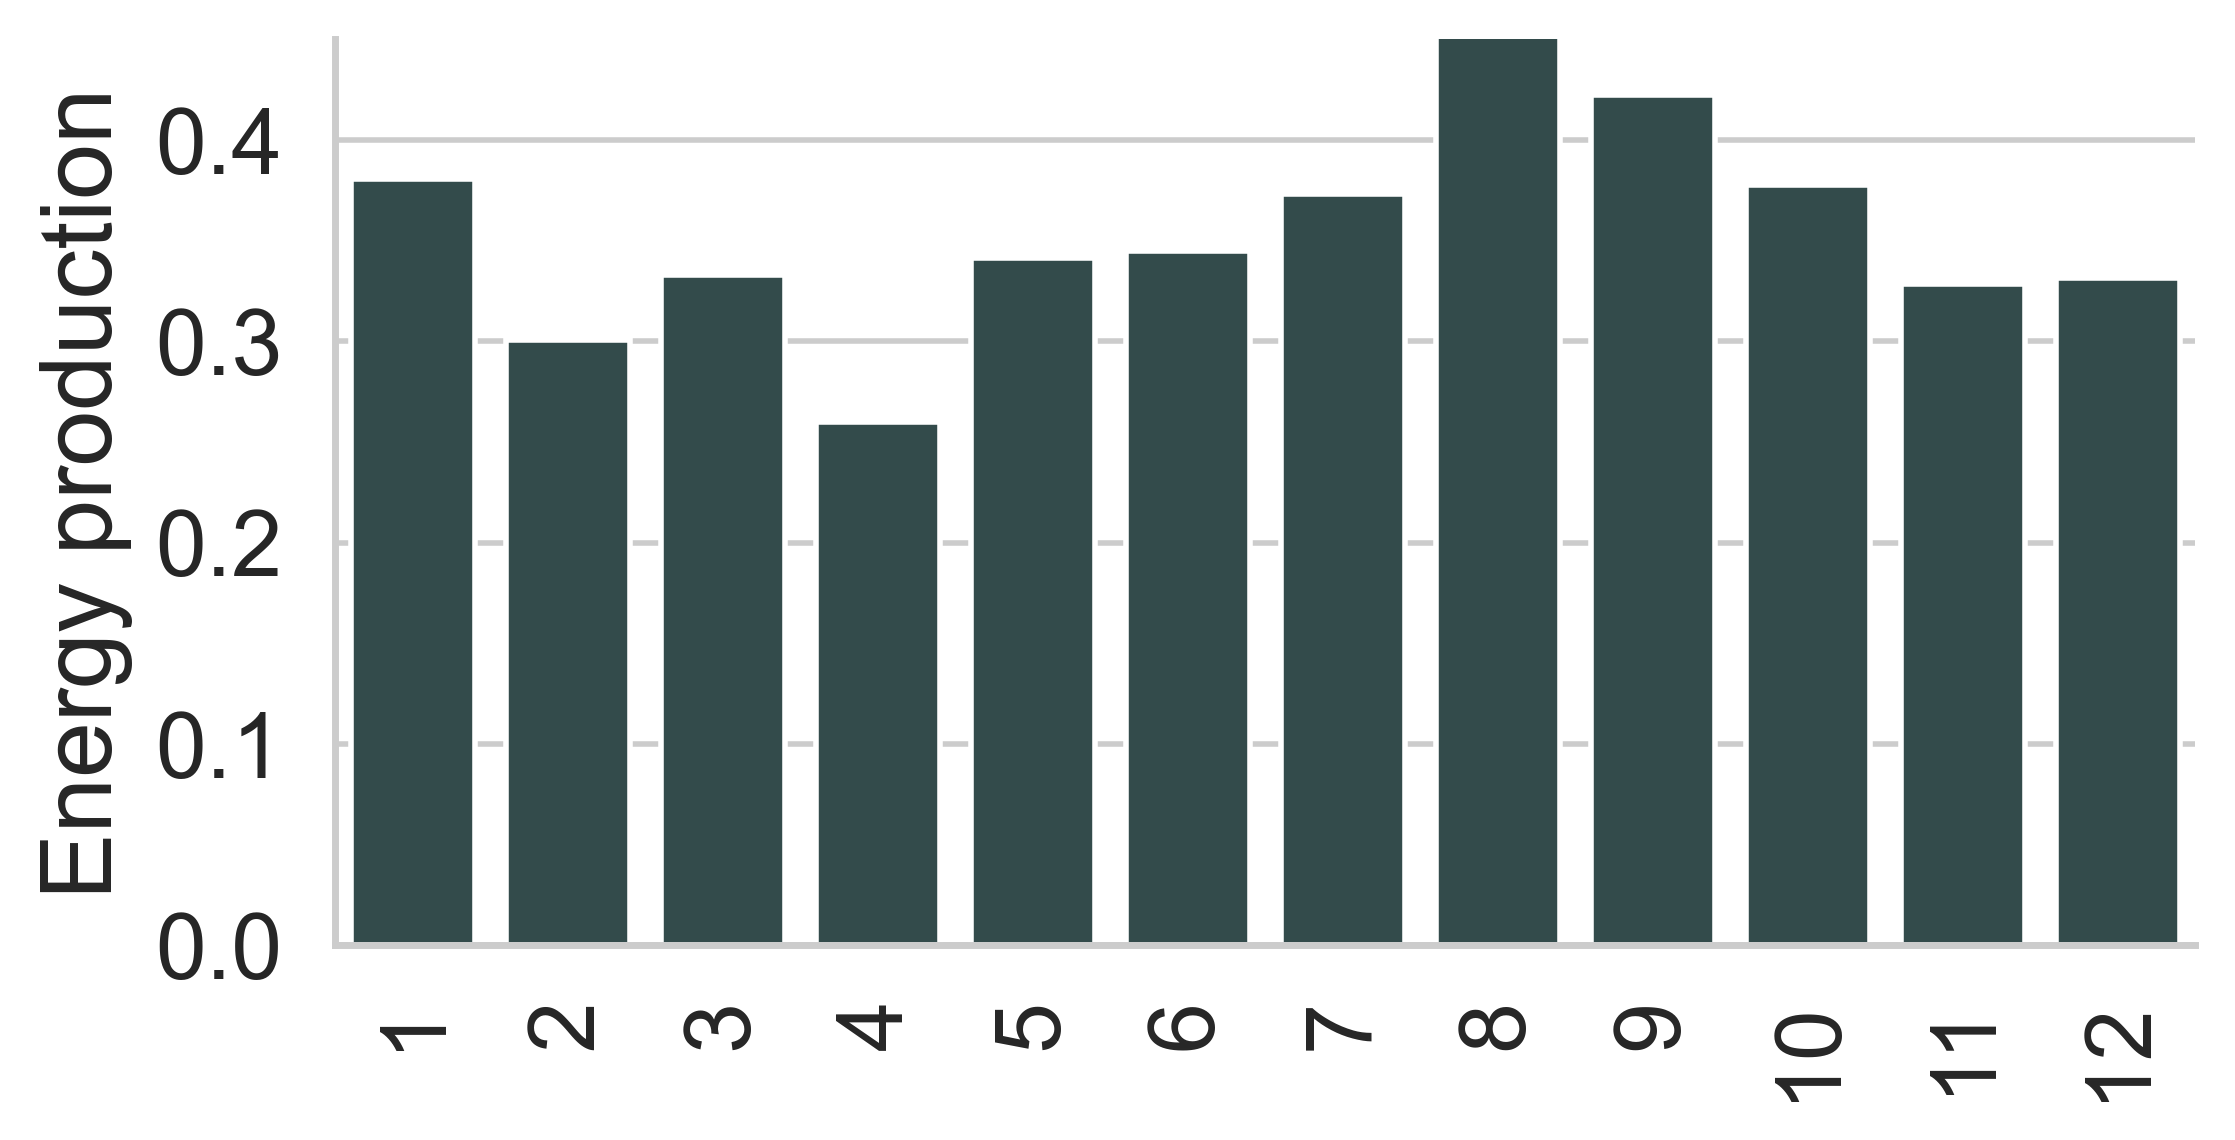

<Figure size 2400x1200 with 0 Axes>

In [60]:
kwargs =   {'order' : None,
            'color' : 'darkslategray',
            'hue' : None}

plot_x_y(x_var = "MONTH", ylim= 0.45, kwargs= kwargs)

# TARGETVAR by WEEKDAY

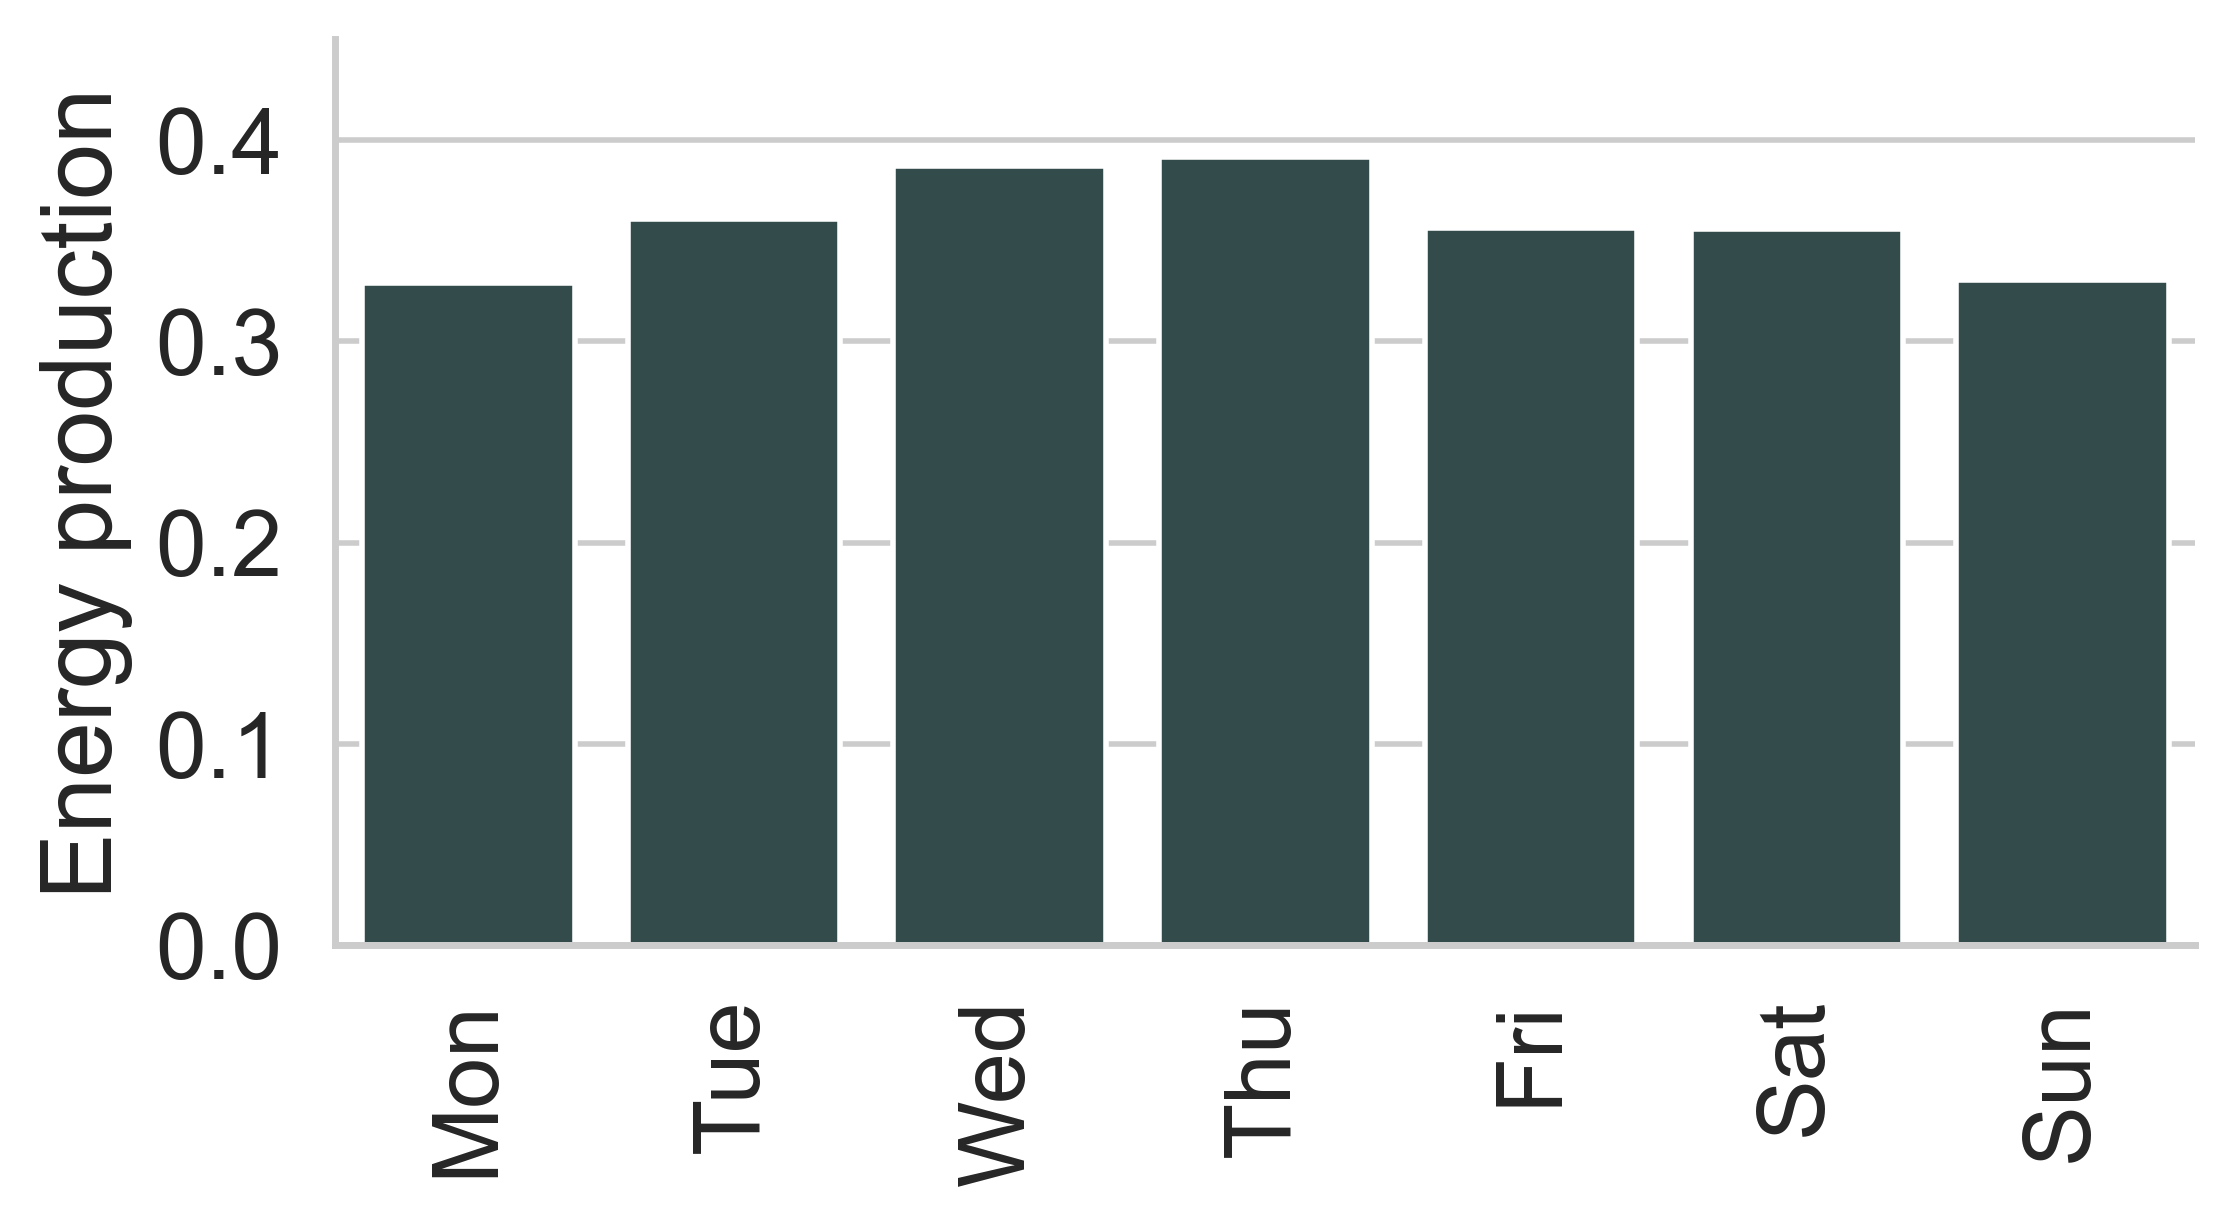

<Figure size 2400x1200 with 0 Axes>

In [64]:
kwargs =   {'order' : None,
            'color' : 'darkslategray',
            'hue' : None}

plot_x_y(x_var = "WEEKDAY", x_ticklabels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], kwargs= kwargs)

# TARGETVAR by IS PUBLIC HOLIDAY

In [ ]:
def hooman(x):
    return 'Yes' if x == 1 else 'No'


df['IS_HOLIDAY_HOOMAN'] = df.IS_HOLIDAY.apply(lambda x: hooman(x))

fontsize = 13

fig, ax = plt.subplots()
sns.barplot(data = df, 
            x = 'IS_HOLIDAY_HOOMAN', 
            y = 'TARGETVAR', 
            ax = ax,
            color = 'powderblue', 
            ci = None)
ax.tick_params(axis='both', labelsize=fontsize)
plt.xlabel('')
plt.ylabel('')
plt.ylim((0,0.45))
plt.show()